In [195]:
# Finance Data Project 
#In this data project we will focus on exploratory data analysis of stock prices. 

In [ ]:
#we need datareader from pandas to import stock data
#In pandas_datareader we need data and wb(extract data from various Internet sources into a pandas DataFrame )
#we need datatime to specifcy start and end date of stock data

In [197]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [198]:
#DATA

# We need to get data using pandas datareader. We will get stock information for the following banks:
# * Bank of America
# * CitiGroup
# * Goldman Sachs
# * JPMorgan Chase
# * Morgan Stanley
# * Wells Fargo


In [199]:
#we need start, end, and ticker information
#(format)start , end= datetime.datetime(%Y,%m,%d)

In [200]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [ ]:
#variable = data.DataReader('ticker','yahoo finance',start, end)
#variable will be saved in pandas.DataFrame format

In [192]:
BAC = data.DataReader('BAC','yahoo',start, end)
C = data.DataReader('C','yahoo',start, end)
GS = data.DataReader('GS','yahoo', start, end )
JPM = data.DataReader('JPM','yahoo', start, end )
MS = data.DataReader('MS','yahoo', start, end )
WFC = data.DataReader('WFC','yahoo', start, end )

In [201]:
BAC 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.298687
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.923801
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.968796
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.916302
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.938789
...,...,...,...,...,...,...
2015-12-24,17.379999,17.219999,17.320000,17.270000,29369400.0,15.969635
2015-12-28,17.230000,16.980000,17.219999,17.129999,41777500.0,15.840177
2015-12-29,17.350000,17.160000,17.250000,17.280001,45670400.0,15.978883


In [202]:
GS

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,107.575417
2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600.0,106.089539
2006-01-05,127.320000,125.610001,126.000000,127.040001,3717400.0,106.047821
2006-01-06,129.250000,127.290001,127.290001,128.839996,4319600.0,107.550362
2006-01-09,130.619995,128.000000,128.500000,130.389999,4723500.0,108.844261
...,...,...,...,...,...,...
2015-12-24,183.169998,182.020004,182.270004,182.470001,1107600.0,170.453247
2015-12-28,181.929993,179.839996,181.770004,181.619995,1723300.0,169.659225
2015-12-29,184.179993,182.500000,182.820007,183.529999,1848900.0,171.443420


In [203]:
#they all have same column data's,so we concatenate them into single data frame as df
#use pd.concat(pass dataFrame in list)
#create tickers =[column values  for the dataframes ] and pass it to keys to make a multi index values

In [204]:
tickers = ['BAC','C','GS','JPM','MS','WFC']

In [205]:
df=pd.concat([BAC,C,GS,JPM,MS,WFC], axis =1,keys= tickers)

In [206]:
df

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.298687   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.923801   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.968796   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.916302   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.938789   
...               ...        ...        ...        ...         ...        ...   
2015-12-24  17.379999  17.219999  17.320000  17.270000  29369400.0  15.969635   
2015-12-28  17.230000  16.980000  17.219999  17.129999  41777500.0  15.840177   
2015-12-29  17.350000  17.160000  17.250000  17.280001  45670400.0  15.978883   
2015-12-30  17.240000  17.040001  17.200001  17.049999  35066400.0  15.766198   
2015-12-31  17.070000  16.830000  17.010000  16.830000  47153000.0  15.562767   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   
...                ...         ...         ...         ...  ...        ...   
2015-12-24   52.970001   52.450001   52.480000   52.709999  ...  32.570000   
2015-12-28   52.570000   51.959999   52.570000   52.380001  ...  32.360001   
2015-12-29   53.220001   52.740002   52.759998   52.980000  ...  32.439999   
2015-12-30   52.939999   52.250000   52.840000   52.299999  ...  32.500000   
2015-12-31   52.389999   51.750000   52.070000   51.750000  ...  31.910000   

                                                   WFC                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  37.429329  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  37.455013  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  37.557716  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  37.596241  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  37.994202  31.825001  31.555000  31.674999   
...               ...        ...        ...        ...        ...        ...   
2015-12-24  32.480000  2798200.0  29.116337  55.090000  54.709999  54.970001   
2015-12-28  32.169998  5420300.0  28.838438  54.779999  54.169998  54.549999   
2015-12-29  32.549999  6388200.0  29.179089  55.349998  54.990002  55.110001   
2015-12-30  32.230000  5057200.0  28.892221  55.310001  54.790001  55.270000   
2015-12-31  31.809999  8154300.0  28.515720  54.950001  54.220001  54.509998   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.408512  
2006-01-04  31.530001  10870000.0  20.171795  
2006-01-05  31.495001  10158000.0  20.149401  
2006-01-06  31.680000   8403800.0  20.267757  
2006-01-09  31.674999   5619600.0  20.264565  
...               ...         ...        ...  
2015-12-24  54.820000   4999400.0  46.785397  
2015-12-28  54.680000   8288800.0  46.665909  
2015-12-29  55.290001   7894900.0  47.186504  
2015-12-30  54.889999   8016900.0  46.845135  
2015-12-31  54.360001  10929800.0  46.392815  

[2517 rows

In [207]:
#add multi index column level names

In [208]:
df.columns.names = ['Bank Ticker','Stock Info']

In [210]:
df

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   
...                ...        ...        ...        ...         ...   
2015-12-24   17.379999  17.219999  17.320000  17.270000  29369400.0   
2015-12-28   17.230000  16.980000  17.219999  17.129999  41777500.0   
2015-12-29   17.350000  17.160000  17.250000  17.280001  45670400.0   
2015-12-30   17.240000  17.040001  17.200001  17.049999  35066400.0   
2015-12-31   17.070000  16.830000  17.010000  16.830000  47153000.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.298687  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.923801  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.968796  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.916302  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.938789  487.399994  483.000000  486.000000  483.899994  ...   
...                ...         ...         ...         ...         ...  ...   
2015-12-24   15.969635   52.970001   52.450001   52.480000   52.709999  ...   
2015-12-28   15.840177   52.570000   51.959999   52.570000   52.380001  ...   
2015-12-29   15.978883   53.220001   52.740002   52.759998   52.980000  ...   
2015-12-30   15.766198   52.939999   52.250000   52.840000   52.299999  ...   
2015-12-31   15.562767   52.389999   51.750000   52.070000   51.750000  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.429329  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.455013  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.557716  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.596241  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.994202  31.825001  31.555000   
...                ...        ...        ...        ...        ...        ...   
2015-12-24   32.570000  32.480000  2798200.0  29.116337  55.090000  54.709999   
2015-12-28   32.360001  32.169998  5420300.0  28.838438  54.779999  54.169998   
2015-12-29   32.439999  32.549999  6388200.0  29.179089  55.349998  54.990002   
2015-12-30   32.500000  32.230000  5057200.0  28.892221  55.310001  54.790001   
2015-12-31   31.910000  31.809999  8154300.0  28.515720  54.950001  54.220001   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.408512  
2006-01-04   31.799999  31.530001  10870000.0  20.171795  
2006-01-05   31.500000  31.495001  10158000.0  20.149401  
2006-01-06   31.580000  31.680000   8403800.0  20.267757  
2006-01-09   31.674999  31.674999   5619600.0  20.264565  
...                ...        ...         ...        ...  
2015-12-24   54.970001  54.820000   4999400.0  46.785397  
2015-12-28   54.549999  54.680000   8288800.0  46.665909  
2015-12-29   55.110001  55.290001   7894900.0  47.186504  
2015-12-30   55.270000  54.889999   8016900.0  46.84513

In [212]:
# EDA

# Let's explore the data a bit! Before continuing.
# What is the max Close price for each bank's stock throughout the time period

In [ ]:
#check the maximum close price of each bank's stock throughout the time period

In [213]:
df.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.298687  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.923801  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.968796  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.916302  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.938789  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.429329  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.455013  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.557716  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.596241  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.994202  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.408512  
2006-01-04   31.799999  31.530001  10870000.0  20.171795  
2006-01-05   31.500000  31.495001  10158000.0  20.149401  
2006-01-06   31.580000  31.680000   8403800.0  20.267757  
2006-01-09   31.674999  31.674999   5619600.0  20.264565  

[5 rows x 36 columns]

In [214]:
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [215]:
# normal custom code to access maximum close price

In [216]:
for ticks in tickers:
    print(ticks ,' : ' ,df[ticks]['Close'].max())

BAC  :  54.900001525878906
C  :  564.0999755859375
GS  :  247.9199981689453
JPM  :  70.08000183105469
MS  :  89.30000305175781
WFC  :  58.52000045776367


In [217]:
#cross section method to access maximum close price 

In [218]:
df.xs(key = 'Close', axis =1,level = 'Stock Info' ).max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [60]:
#create a new DataFrame for returns and
#provide the compared value with the previous day (diff bet [today and previous]close value)

In [50]:
df.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.298687  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.923801  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.968796  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.916302  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.938789  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.429329  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.455013  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.557716  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.596241  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.994202  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.408512  
2006-01-04   31.799999  31.530001  10870000.0  20.171795  
2006-01-05   31.500000  31.495001  10158000.0  20.149401  
2006-01-06   31.580000  31.680000   8403800.0  20.267757  
2006-01-09   31.674999  31.674999   5619600.0  20.264565  

[5 rows x 36 columns]

In [87]:
returns = pd.DataFrame()

In [88]:
for ticks in tickers:
    returns[ticks+' returns'] = df[ticks]['Close'].pct_change()

In [219]:
returns

,BAC returns,C returns,GS returns,JPM returns,MS returns,WFC returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


In [220]:
#first date will have null values because there are no previous date values to compare, so exclude them

In [221]:
returns[1:]
 

,BAC returns,C returns,GS returns,JPM returns,MS returns,WFC returns
Date,,,,,,
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507,-0.000789
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


In [222]:
#use pairplot to see any relation between variables

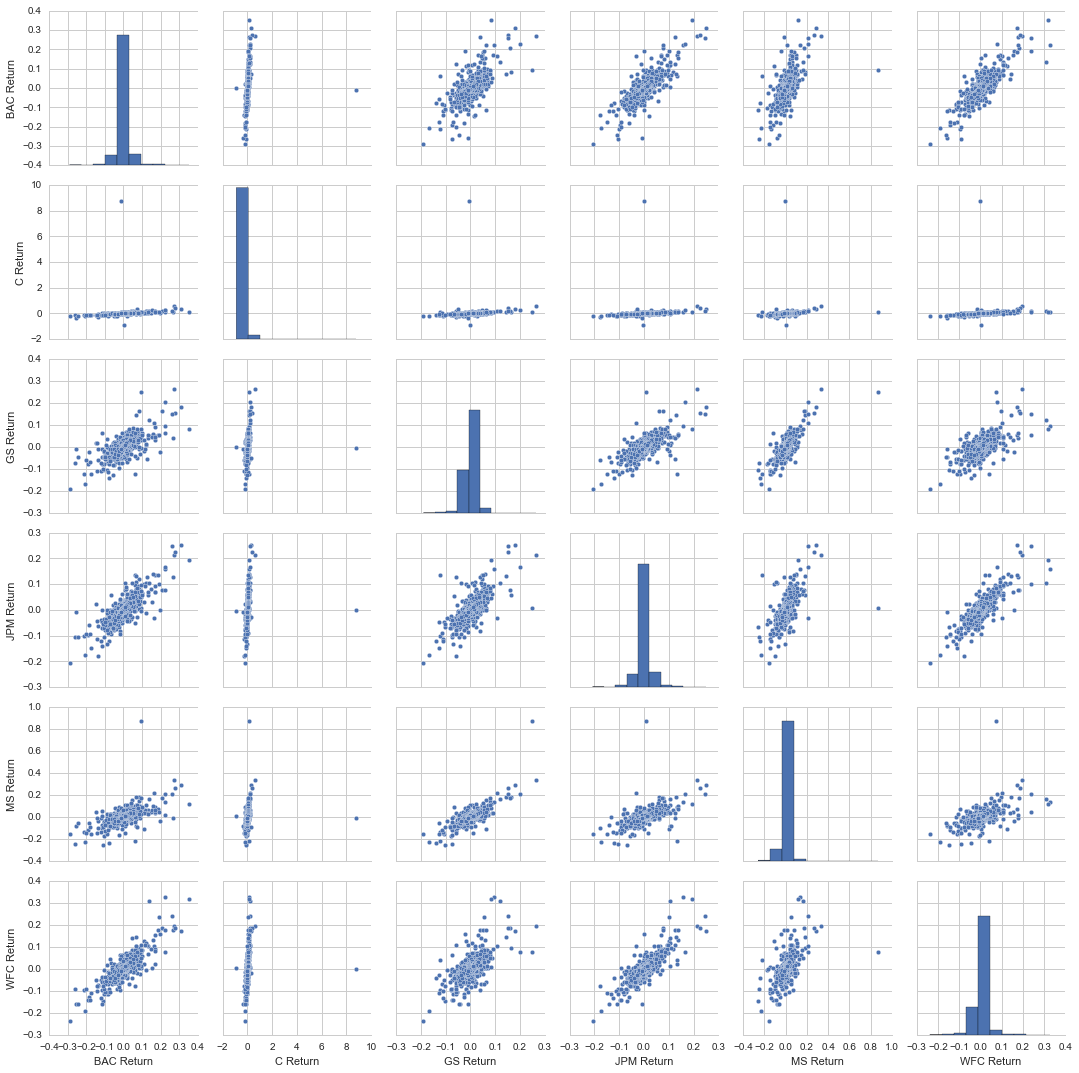

In [68]:
import seaborn as sns
sns.pairplot(returns[1:]) 

In [ ]:
#check min and maximum values of the bank returns and the dates of them

In [223]:
returns.head()

,BAC returns,C returns,GS returns,JPM returns,MS returns,WFC returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [ ]:
#can use any one of the below ways 

In [224]:
returns[returns['BAC returns'] == returns['BAC returns'].min()]['BAC returns']

Date
2009-01-20   -0.289694
Name: BAC returns, dtype: float64

In [225]:
#inferences from the returns
#'MS returns' has the highest returns value and 'JPM returns'  has least gain return values
#'C returns' has the Worst Drop and 'GS returns' has the least Worst Drop

In [226]:
returns.min()

BAC returns   -0.289694
C returns     -0.390244
GS returns    -0.189596
JPM returns   -0.207274
MS returns    -0.258929
WFC returns   -0.238223
dtype: float64

In [227]:
returns.max()

BAC returns    0.352691
C returns      0.578249
GS returns     0.264678
JPM returns    0.250967
MS returns     0.869835
WFC returns    0.327645
dtype: float64

In [228]:
returns.iloc[returns['BAC returns'].argmin()]

BAC returns   -0.289694
C returns     -0.200000
GS returns    -0.189596
JPM returns   -0.207274
MS returns    -0.159718
WFC returns   -0.238223
Name: 2009-01-20 00:00:00, dtype: float64

In [229]:
#use idxmin and idxmax to get the index of the min and max values

In [230]:
#INFERENCES
#'JPM returns' has the Worst Drop on 2009-01-20 and the Best Single Day Gain on the next day(2009-01-21) 
#'MS returns' has the Worst Drop on 2008-10-09 and the Best Single Day Gain after four days 

In [231]:
# Worst Drop

In [232]:
returns.idxmin() 

BAC returns   2009-01-20
C returns     2009-02-27
GS returns    2009-01-20
JPM returns   2009-01-20
MS returns    2008-10-09
WFC returns   2009-01-20
dtype: datetime64[ns]

In [233]:
# Best Single Day Gain

In [234]:
returns.idxmax()

BAC returns   2009-04-09
C returns     2008-11-24
GS returns    2008-11-24
JPM returns   2009-01-21
MS returns    2008-10-13
WFC returns   2008-07-16
dtype: datetime64[ns]

In [235]:
#check the riskiest riskiest over the entire time period over the entire time period, using standard deviation
#high standard deviation - risky 
#'C returns' has the high standard deviation


In [236]:
returns.std()

BAC returns    0.036647
C returns      0.038672
GS returns     0.025390
JPM returns    0.027667
MS returns     0.037819
WFC returns    0.030238
dtype: float64

In [237]:
#check last 5 year  of 'C returns'

In [238]:
returns.head()

,BAC returns,C returns,GS returns,JPM returns,MS returns,WFC returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


In [239]:
returns.loc['2011-01-03':'2015-12-31'].std()

BAC returns    0.022859
C returns      0.021201
GS returns     0.016727
JPM returns    0.016961
MS returns     0.023550
WFC returns    0.014978
dtype: float64

In [240]:
#last five year 'MS returns' has the risky stocks deviations

In [241]:
#Create a distplot using seaborn of the 2015 returns for Morgan Stanley

In [242]:
returns.head()

,BAC returns,C returns,GS returns,JPM returns,MS returns,WFC returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


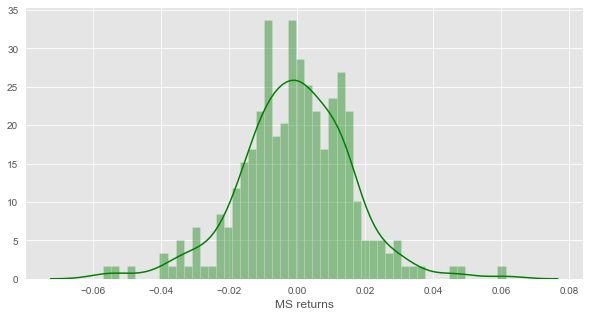

In [243]:
from matplotlib import style 
style.use('ggplot')
plt.figure(figsize= (10,5))
sns.distplot(returns.loc['2015-01-03':'2015-12-31']['MS returns'],color = 'green', bins =50)
 

In [244]:
#Create a distplot using seaborn of the 2008 returns for CitiGroup  

In [245]:
#compared to normal year, citi 2008 has ten times deviated stock values 

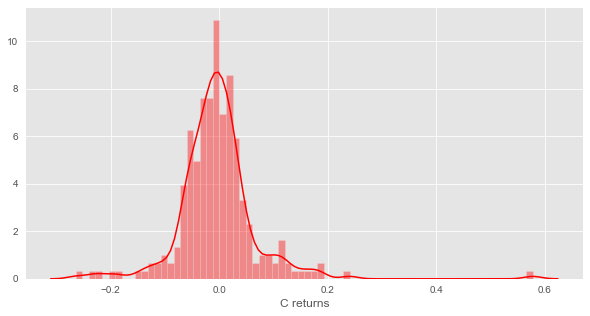

In [246]:
plt.figure(figsize= (10,5))
sns.distplot(returns.loc['2008-01-03':'2008-12-31']['C returns'],color = 'red', bins =70)

In [247]:
#more interactive visualizations

In [248]:
# Optional Plotly Method Imports
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
cf.go_offline()

In [249]:
#Create a line plot showing Close price for each bank for the entire index of time. 
# using a for loop, or use [.xs]to get a cross section of the data.) 

In [250]:
#In 2009 'C' has a significant stock drop 
#other banks also has similar drop on 2009

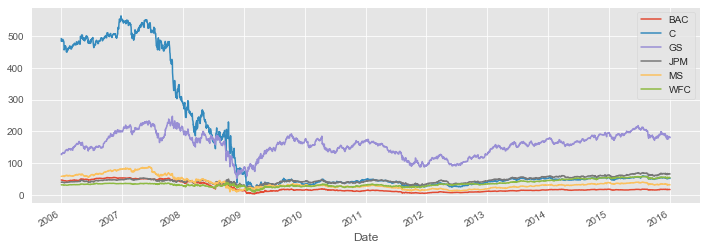

In [251]:
for ticks in tickers:
    df[ticks]['Close'].plot(label = ticks,figsize=(12,4))
plt.legend()

In [252]:
#using cross section method

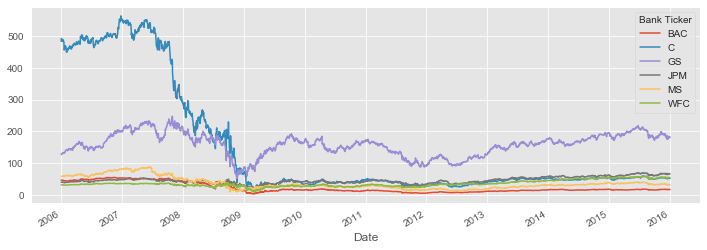

In [253]:
df.xs(key = 'Close',level ='Stock Info', axis=1 ).plot(label = ticks,figsize=(12,4))

In [254]:
#cufflinks for more interactive analysis

In [255]:
df.xs(key = 'Close',level ='Stock Info', axis=1 ).iplot()

In [ ]:
#Let's analyze the moving averages for these stocks in the year 2008. 
# Plot the rolling 30 day average against the Close Price for Citi group's stock for the year 2008 

In [256]:
C.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,440.882477
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870900.0,432.742950
2006-01-05,487.799988,484.000000,484.399994,486.200012,1143100.0,434.889679
2006-01-06,489.000000,482.000000,488.799988,486.200012,1370200.0,434.889679
2006-01-09,487.399994,483.000000,486.000000,483.899994,1680700.0,432.832489


In [257]:
#DataFrame.loc['start': 'end']['column'].rolling(window=size).aggregate_method()
#aggregate_method() = mean(),min(),sum
#window=7(WEEKLY), 30(MONTHLY),90(QUARTELY)

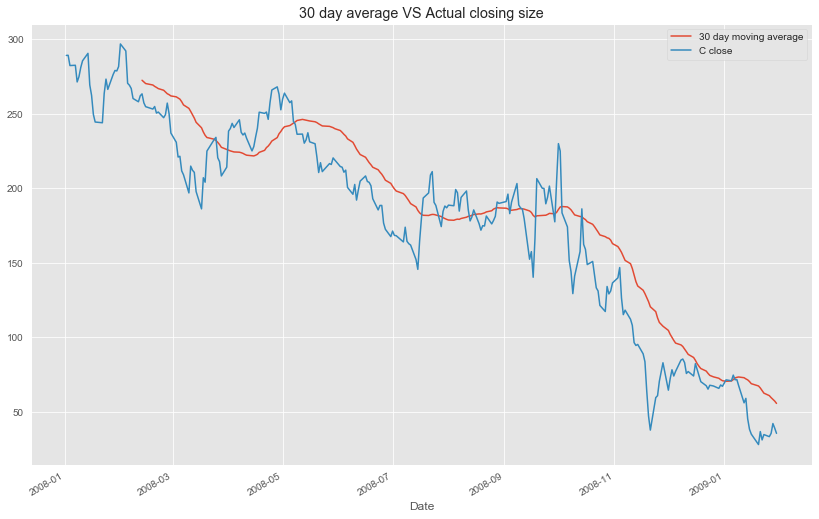

In [269]:
plt.figure(figsize=(14,9))
plt.title("30 day average VS Actual closing size")
C.loc['2008-01-01':'2009-02-01']['Close'].rolling(window = 30).mean() .plot(label = '30 day moving average')
C.loc['2008-01-01':'2009-02-01']['Close'].plot(label ='C close')
plt.legend()

In [ ]:
#cluster and heat provides a lot of insights in the data and to find trends in data

In [ ]:
#Create a heatmap of the correlation between the stocks Close Price 

In [270]:
df.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.298687  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.923801  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.968796  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.916302  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.938789  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.429329  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.455013  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.557716  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.596241  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.994202  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.408512  
2006-01-04   31.799999  31.530001  10870000.0  20.171795  
2006-01-05   31.500000  31.495001  10158000.0  20.149401  
2006-01-06   31.580000  31.680000   8403800.0  20.267757  
2006-01-09   31.674999  31.674999   5619600.0  20.264565  

[5 rows x 36 columns]

In [ ]:
#create matrix form using correlation method

In [274]:
df.xs(key='Close',level = 'Stock Info',axis =1).corr()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.971516,0.550898,0.103874,0.944218,0.008542
C,0.971516,1.000000,0.434123,0.003515,0.933609,-0.068536
GS,0.550898,0.434123,1.000000,0.685286,0.683792,0.499897
JPM,0.103874,0.003515,0.685286,1.000000,0.250427,0.940269
MS,0.944218,0.933609,0.683792,0.250427,1.000000,0.131835
WFC,0.008542,-0.068536,0.499897,0.940269,0.131835,1.000000


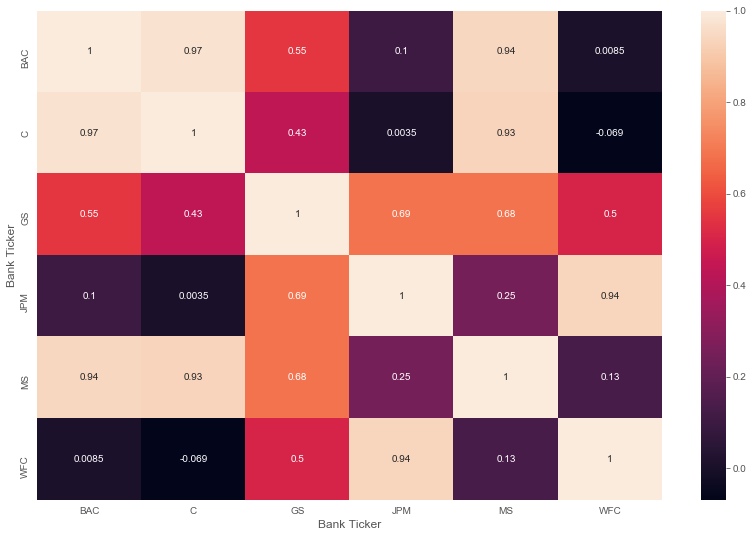

In [279]:
plt.figure(figsize=(14,9))
sns.heatmap(df.xs(key='Close',level = 'Stock Info',axis =1).corr(), annot =True)


In [ ]:
#Check the similar clustering of data

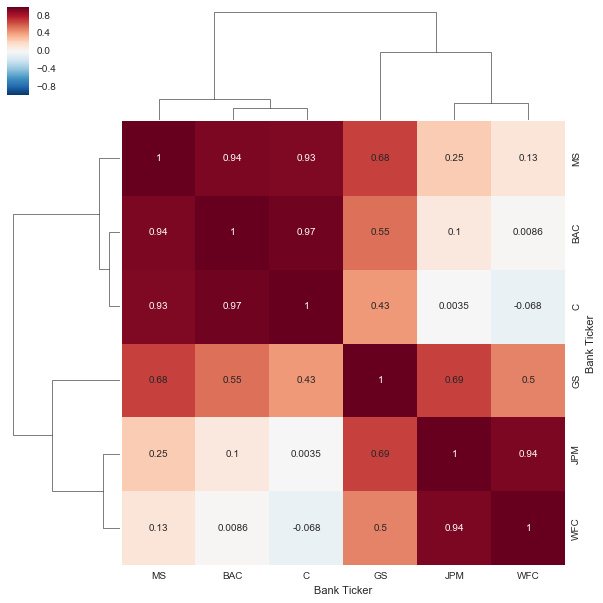

In [26]:
sns.clustermap(df.xs(key='Close',level = 'Stock Info',axis =1).corr(), annot =True)

In [ ]:
#Heatmap using cufflinks  

In [281]:
corr_table = df.xs(key='Close',level = 'Stock Info',axis =1).corr()

In [283]:
corr_table.iplot(kind = 'heatmap',colorscale= 'rdylbu')

In [ ]:
#special cufflink and plotly visualization for financial data 

In [ ]:
#Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016 

In [ ]:
#candle plot states the plot went up or down and open,high,close and down information

In [324]:
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.298687
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.923801
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,34.968796
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,34.916302
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,34.938789


In [326]:
bac15 = BAC[['High','Low','Open','Close']].loc['2015-01-02':'2015-12-31']
bac15.iplot(kind = 'candle',up_color='blue',down_color='red')

In [ ]:
#Simple Moving Averages plot
#technical analysis plot

In [331]:
BAC['Close'].loc['2015-01-02':'2015-12-31'].ta_plot(study ='sma', periods=[13,21,55])

In [ ]:
#Bollinger Band Plot - provides standard deviation of the stock price that moves over time

In [329]:
BAC['Close'].loc['2015-01-02':'2015-12-31'].ta_plot(study ='boll' )